# Car Price Prediction

## Part 1 - EDA

## Imports

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [25]:
dataset = pd.read_csv("Car_details_xl.csv")
dataset.head()

,manufacturer,model,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_int,mileage,engine_cc,max_power_bhp,torque,seats
0,Maruti,Swift Dzire,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23,23.4 kmpl,1248,74,190Nm@ 2000rpm,5
1,Skoda,Rapid,Skoda Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,21.14 kmpl,1498,104,250Nm@ 1500-2500rpm,5
2,Hyundai,i20 Sportz,Hyundai i20 Sportz,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,23.0 kmpl,1396,90,22.4 kgm at 1750-2750rpm,5
3,Hyundai,Xcent,Hyundai Xcent,2017,440000,45000,Petrol,Individual,Manual,First Owner,20,20.14 kmpl,1197,82,113.75nm@ 4000rpm,5
4,Toyota,Etios,Toyota Etios,2011,350000,90000,Diesel,Individual,Manual,First Owner,24,23.59 kmpl,1364,67,170Nm@ 1800-2400rpm,5


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   manufacturer   6799 non-null   object
 1   model          6799 non-null   object
 2   name           6799 non-null   object
 3   year           6799 non-null   int64 
 4   selling_price  6799 non-null   int64 
 5   km_driven      6799 non-null   int64 
 6   fuel           6799 non-null   object
 7   seller_type    6799 non-null   object
 8   transmission   6799 non-null   object
 9   owner          6799 non-null   object
 10  mileage_int    6799 non-null   int64 
 11  mileage        6799 non-null   object
 12  engine_cc      6799 non-null   int64 
 13  max_power_bhp  6799 non-null   int64 
 14  torque         6799 non-null   object
 15  seats          6799 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 850.0+ KB


## EDA

### Selling price Overview

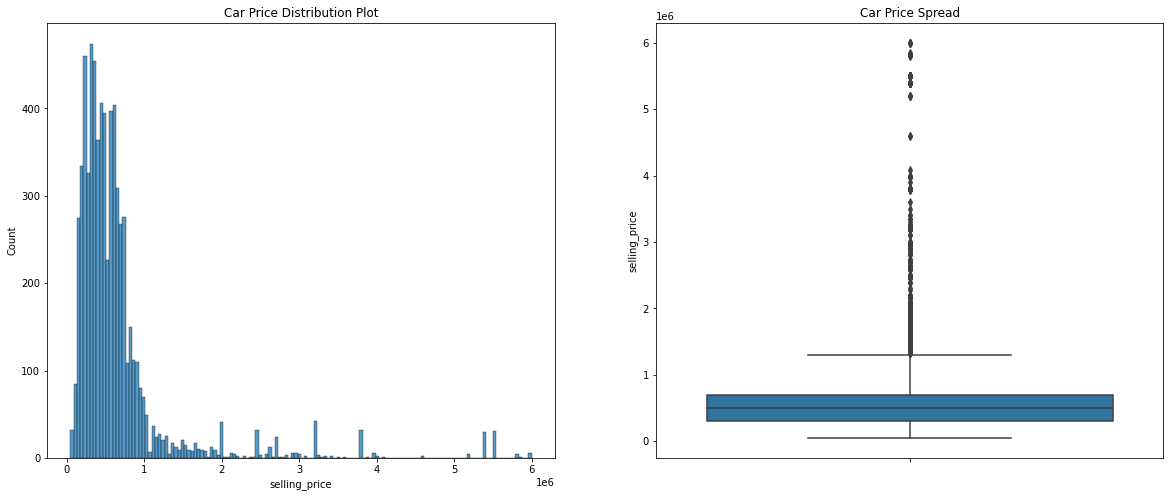

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(dataset.selling_price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=dataset.selling_price)

plt.show();

### Seeing Price percentiles of selling price

In [28]:
print(dataset.selling_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    6.799000e+03
mean     6.610438e+05
std      7.482072e+05
min      4.500000e+04
25%      3.000000e+05
50%      4.930000e+05
75%      7.000000e+05
85%      8.500000e+05
90%      1.025000e+06
100%     6.000000e+06
max      6.000000e+06
Name: selling_price, dtype: float64


### Explore Cars' Manufacturer , Fuel type and Seller Type in our dataset

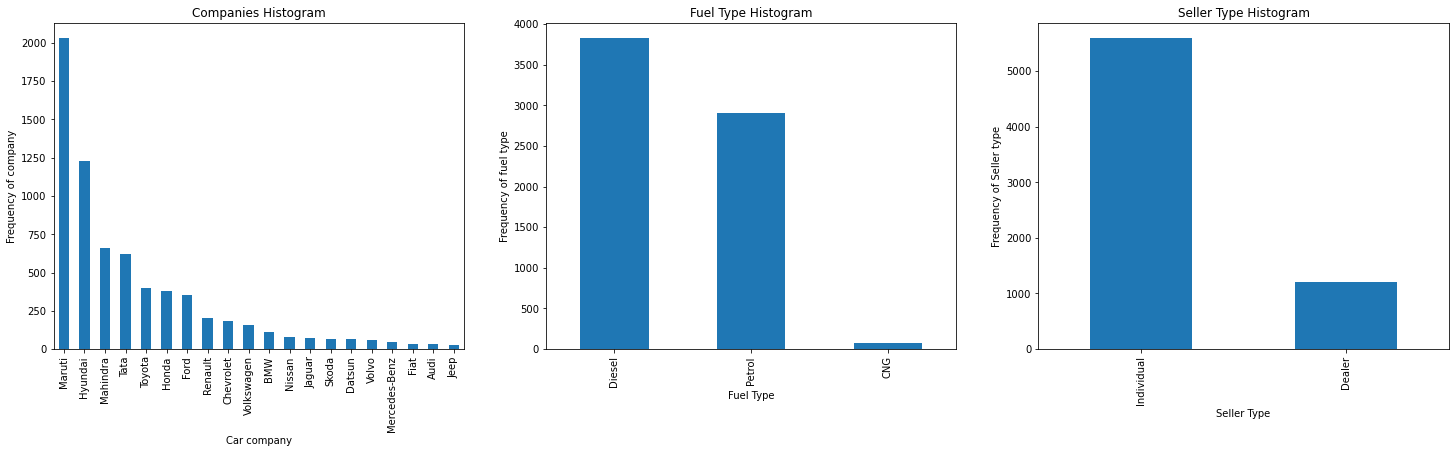

In [29]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = dataset.manufacturer.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = dataset.fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = dataset.seller_type.value_counts().plot(kind='bar')
plt.title('Seller Type Histogram')
plt1.set(xlabel = 'Seller Type', ylabel='Frequency of Seller type')

plt.show()

- Maruti has most number of cars followed by Hyundai and Mahindra . No doubt these are the major car sellers
- Our dataset has more number of diesel cars than petrol cars and a few of cng cars though cng cars can be used as petrol cars
- Most cars are sold directly by individuals rather than dealers

### Count of cars by Transmission Type , Fuel Type.

<AxesSubplot:title={'center':'Fuel Type Histogram'}, xlabel='fuel', ylabel='count'>

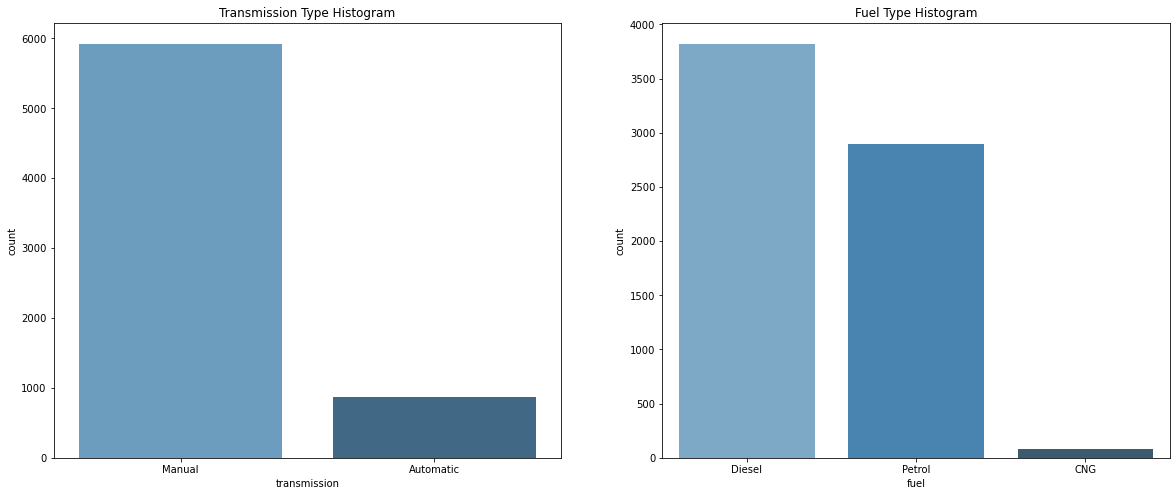

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Transmission Type Histogram')
sns.countplot(dataset.transmission, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type Histogram')
sns.countplot(dataset.fuel, palette=("Blues_d"))

####
- We have a majority of manual cars .
- we have Most of DIESEL cars and a comparitively less PETROL cars and a few of CNG cars as CNG cars can also be used with petrol

### Count of cars by Owner Type , Seller Type.

<AxesSubplot:title={'center':'Engine Type Count'}, xlabel='seller_type', ylabel='count'>

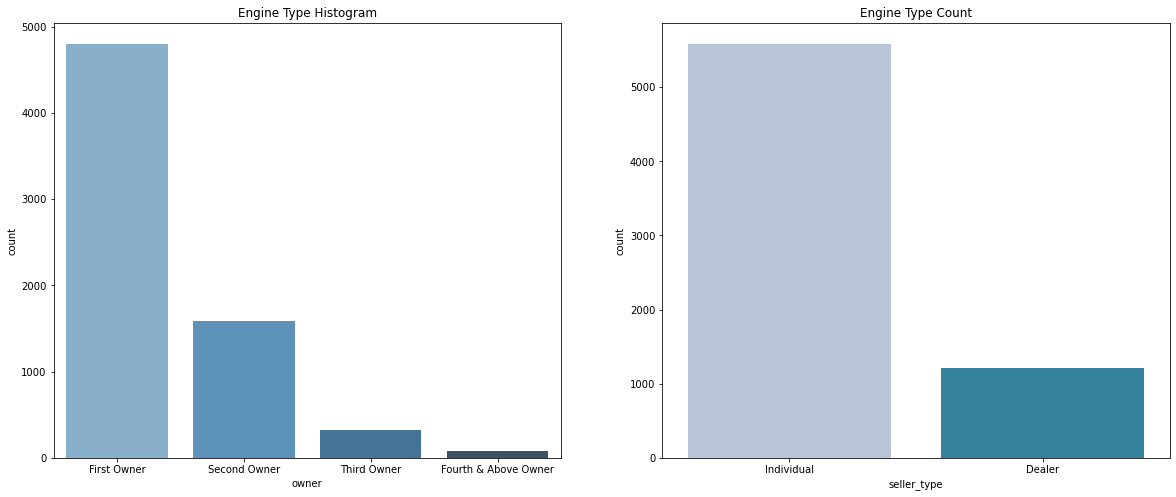

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(dataset.owner, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type Count')
sns.countplot(dataset.seller_type, palette=("PuBuGn"))

- Most of the cars are First Owner owned followed by Second Owner
- Third and forth and above owners are less
- Most of cars are sold by individuals themselves rather than dealers

### Cars' Price - Transmission Type and Fule type Vs Avg Selling Price

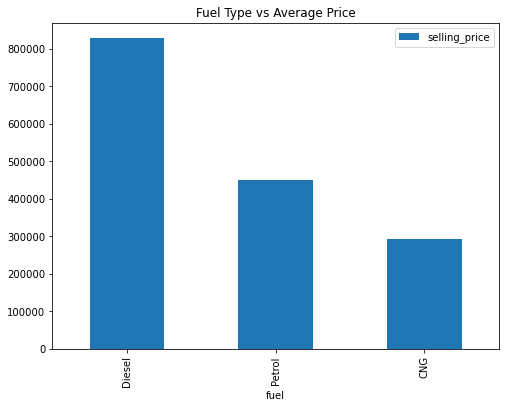

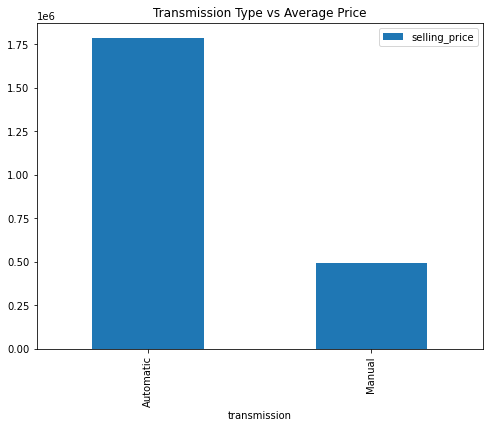

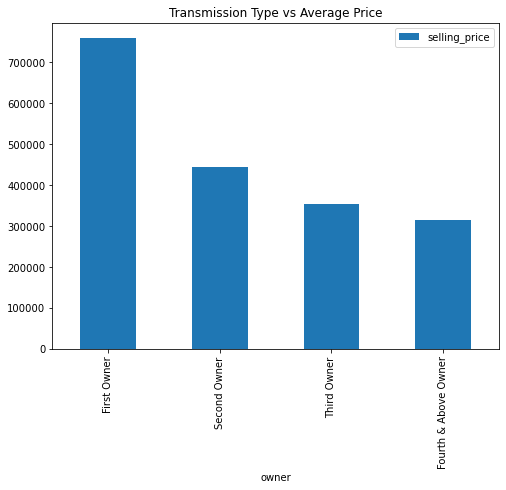

In [32]:
df = pd.DataFrame(dataset.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')

df = pd.DataFrame(dataset.groupby(['transmission'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Transmission Type vs Average Price')

df = pd.DataFrame(dataset.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Transmission Type vs Average Price')

plt.show()

### Cars Price - Boxplot

<AxesSubplot:title={'center':'Owner Type vs Selling Price'}, xlabel='owner', ylabel='selling_price'>

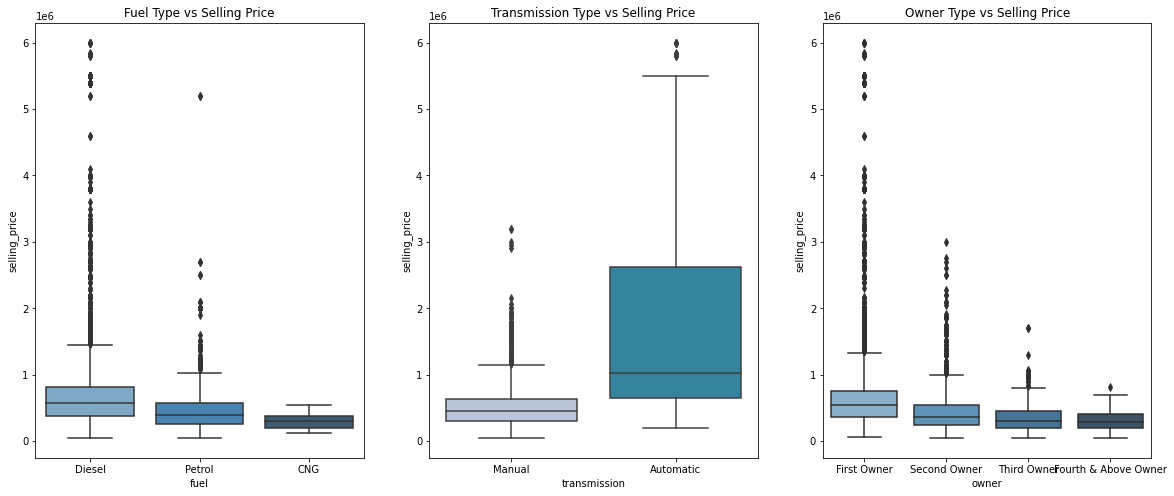

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Fuel Type vs Selling Price')
sns.boxplot(x=dataset.fuel,y=dataset.selling_price, palette=("Blues_d"))

plt.subplot(1,3,2)
plt.title('Transmission Type vs Selling Price')
sns.boxplot(x=dataset.transmission, y=dataset.selling_price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('Owner Type vs Selling Price')
sns.boxplot(x=dataset.owner,y=dataset.selling_price, palette=("Blues_d"))

### Cars Manufacturer vs Price 

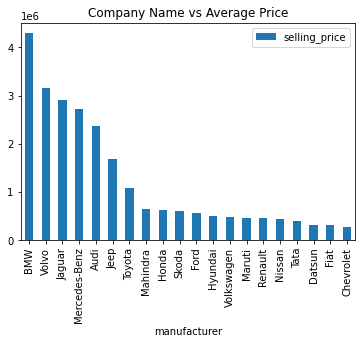

In [34]:
df = pd.DataFrame(dataset.groupby(['manufacturer'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()



### Year vs Price

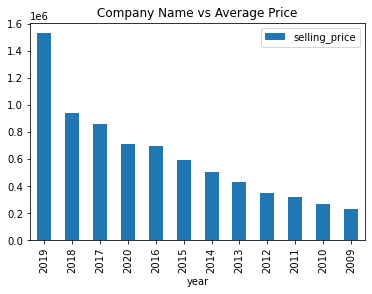

In [35]:
df = pd.DataFrame(dataset.groupby(['year'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

### KM driven vs AVG price

In [36]:
# plt.figure(figsize=(25, 6))

# df = pd.DataFrame(dataset.groupby(['km_driven'])['selling_price'].mean().sort_values(ascending = False))
# df.plot.bar()
# plt.title('KM driven vs Average Price')
# plt.show()

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='km_driven', ylabel='Count'>

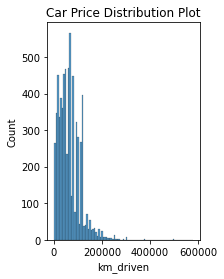

In [37]:
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(dataset.km_driven)

### Pairplot of selling price

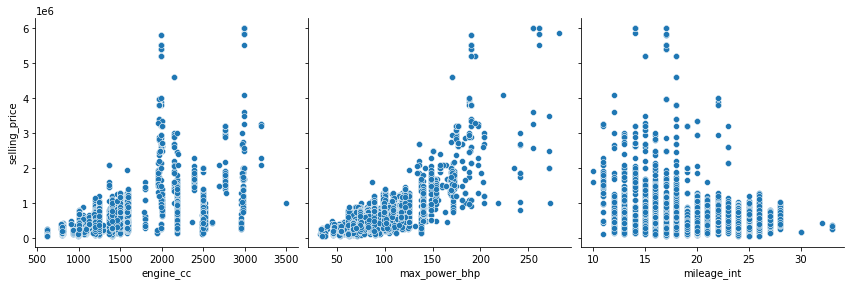

In [38]:
def pp(x,y,z):
    sns.pairplot(dataset, x_vars=[x,y,z], y_vars='selling_price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('engine_cc', 'max_power_bhp', 'mileage_int')

### Full dataset Pairplot

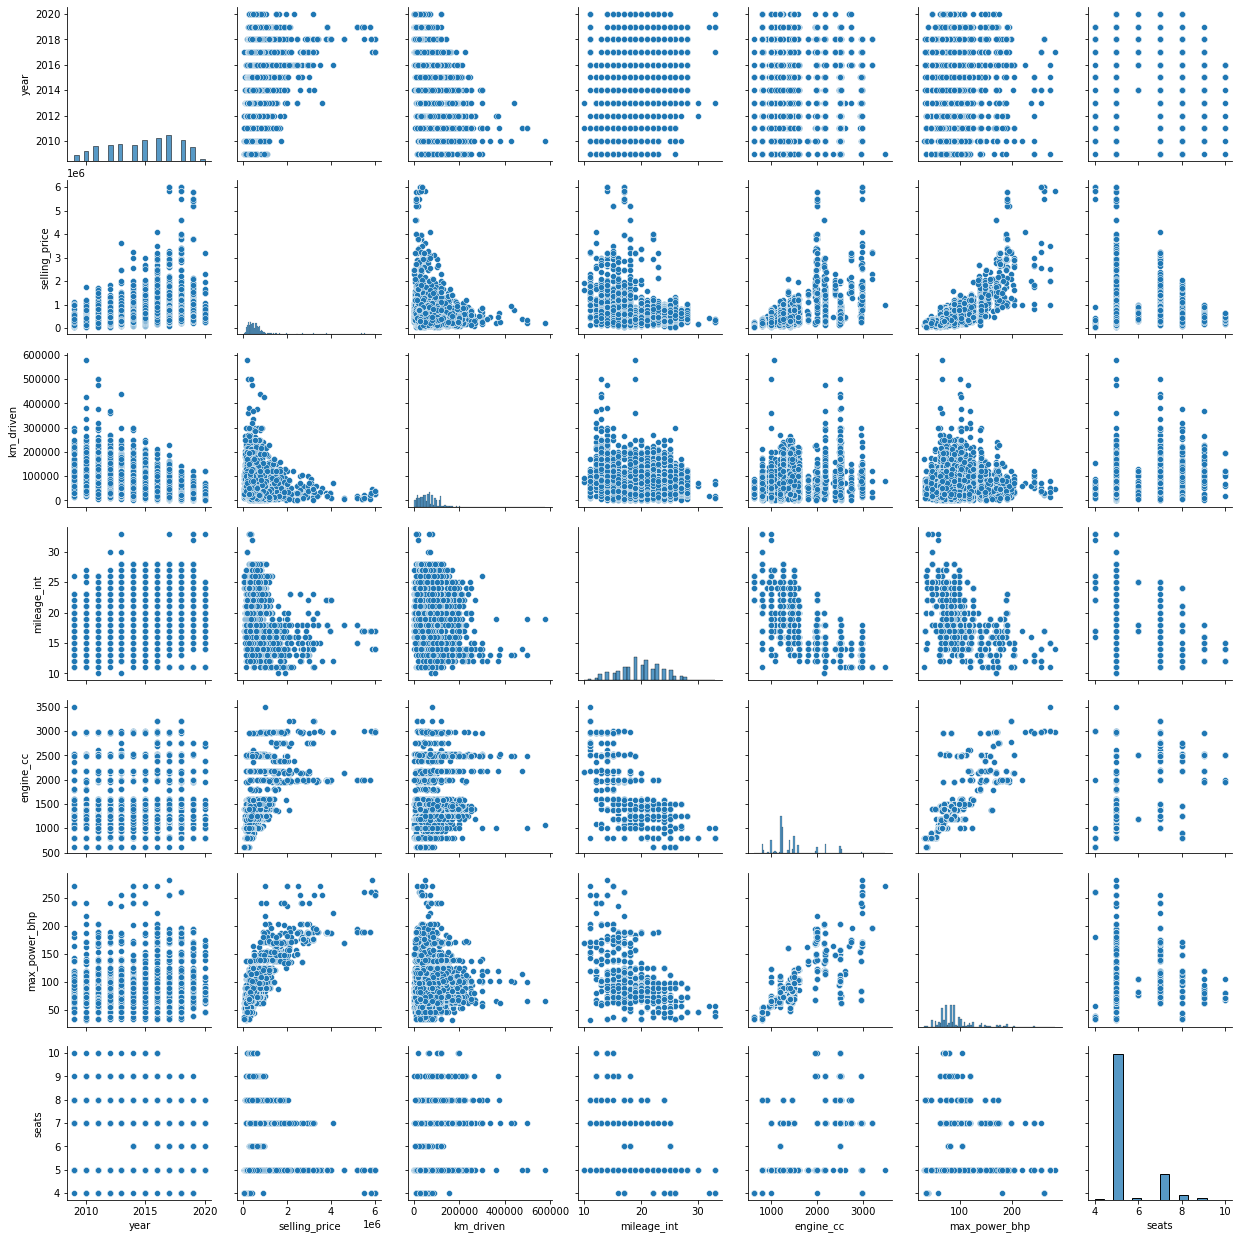

In [39]:
sns.pairplot(dataset)
plt.show()

## Feature Extraction

In [40]:
fe_ds = dataset[['manufacturer','model','year','km_driven','fuel','seller_type','transmission','selling_price']]

In [41]:
fe_ds.head()

,manufacturer,model,year,km_driven,fuel,seller_type,transmission,selling_price
0,Maruti,Swift Dzire,2014,145500,Diesel,Individual,Manual,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,370000
2,Hyundai,i20 Sportz,2010,127000,Diesel,Individual,Manual,225000
3,Hyundai,Xcent,2017,45000,Petrol,Individual,Manual,440000
4,Toyota,Etios,2011,90000,Diesel,Individual,Manual,350000


In [42]:
fe_ds['age'] = 2022 - fe_ds['year']

In [43]:
fe_ds.drop(['year'], axis=1,inplace=True)

In [44]:
fe_ds.describe()

,km_driven,selling_price,age
count,6799.000000,6.799000e+03,6799.000000
mean,65454.664215,6.610438e+05,7.181939
std,46704.530239,7.482072e+05,2.825772
min,1000.000000,4.500000e+04,2.000000
25%,30000.000000,3.000000e+05,5.000000
50%,60000.000000,4.930000e+05,7.000000
75%,90000.000000,7.000000e+05,9.000000
max,577414.000000,6.000000e+06,13.000000
